In [1]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import f_oneway

In [6]:
deng = pd.read_csv('dengue.csv')

In [7]:
deng

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


<h1>Data Preparation</h1>

In [8]:
deng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          1020 non-null   object
 1   Year           1020 non-null   int64 
 2   Region         1020 non-null   object
 3   Dengue_Cases   1020 non-null   int64 
 4   Dengue_Deaths  1020 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 40.0+ KB


In [9]:
deng.describe()

,Year,Dengue_Cases,Dengue_Deaths
count,1020.000000,1020.000000,1020.000000
mean,2018.000000,1124.926471,16.513725
std,1.414907,1662.608878,96.358215
min,2016.000000,10.000000,0.000000
25%,2017.000000,247.750000,1.000000
50%,2018.000000,582.500000,3.000000
75%,2019.000000,1284.250000,7.000000
max,2020.000000,21658.000000,1651.000000


In [10]:
deng.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,1020.0,2018.000000,1.414907,2016.0,2017.00,2018.0,2019.00,2020.0
Dengue_Cases,1020.0,1124.926471,1662.608878,10.0,247.75,582.5,1284.25,21658.0
Dengue_Deaths,1020.0,16.513725,96.358215,0.0,1.00,3.0,7.00,1651.0


In [11]:
deng.dtypes

Month            object
Year              int64
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
dtype: object

In [12]:
deng.isnull().sum()

Month            0
Year             0
Region           0
Dengue_Cases     0
Dengue_Deaths    0
dtype: int64

In [13]:
deng['Region'] = deng['Region'].astype('category')
deng['Month'] = deng['Month'].astype('category')

In [14]:
deng.dtypes

Month            category
Year                int64
Region           category
Dengue_Cases        int64
Dengue_Deaths       int64
dtype: object

<h1> Data Analytics</h1>

In [15]:
deng_Ave = deng.groupby('Month')['Dengue_Cases'].mean()
deng_Ave

Month
April         382.447059
August       2206.517647
December     1040.364706
February      915.305882
January       992.094118
July         1626.376471
June          683.647059
March         677.364706
May           381.023529
November     1116.470588
October      1384.058824
September    2093.447059
Name: Dengue_Cases, dtype: float64

<h2>Question No.1: </h2>

<h3>The analysis shows that August experiences the highest average number of dengue cases, while May has the lowest.</h3>

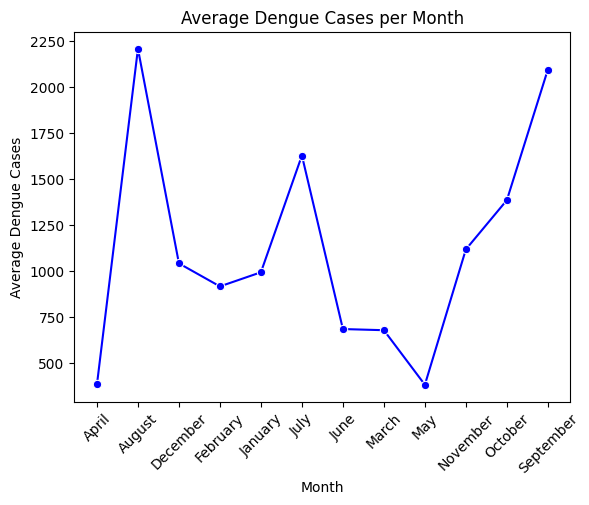

<Figure size 1200x600 with 0 Axes>

In [26]:
monthly_cases = deng.groupby("Month")["Dengue_Cases"].mean().sort_values()

sns.lineplot(x=monthly_cases.index, y=monthly_cases.values, marker="o", color="blue")
plt.title("Average Dengue Cases per Month")
plt.xlabel("Month")
plt.ylabel("Average Dengue Cases")
plt.xticks(rotation=45)
plt.figure(figsize=(12, 6))
plt.show()

<h2>Question No.2: The average number of dengue cases per month across all regions.</h2>

<h3>The data shows the average number of dengue cases per month in all regions. August has the most cases, with an average of 2,206.52, while May has the fewest, with an average of 381.02.</h3>

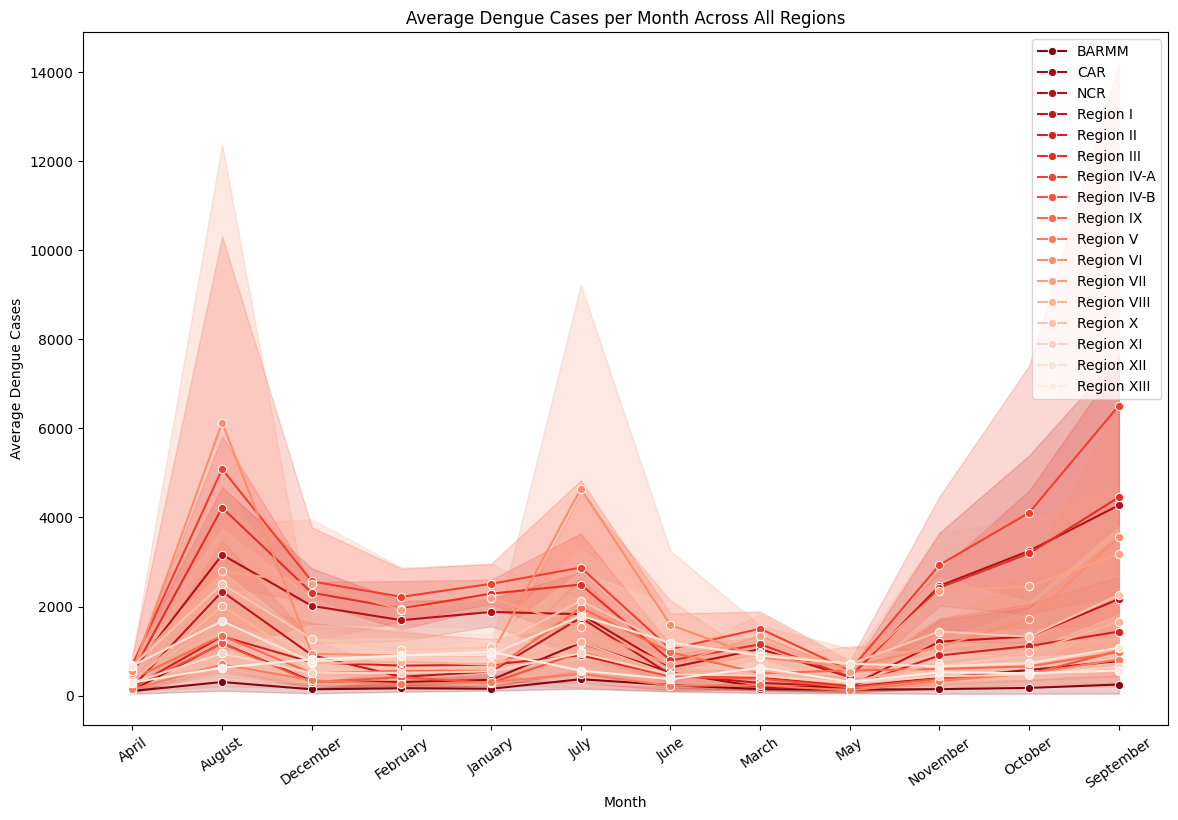

In [25]:
plt.figure(figsize=(14, 9))
sns.lineplot(data=deng, x='Month', y='Dengue_Cases',hue='Region', marker='o', palette='Reds_r')
plt.title('Average Dengue Cases per Month Across All Regions')
plt.xlabel('Month')
plt.ylabel('Average Dengue Cases')
plt.xticks(rotation=35)
plt.legend(loc='upper right')
plt.show()


<h2>Question No.3: </h2>

<h3>Region IV-A has the highest number of total dengue cases, followed by Region III and Region VI.</h3>

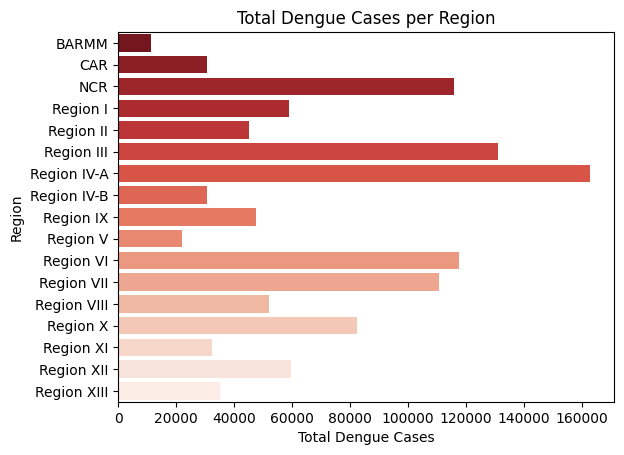

<Figure size 1200x600 with 0 Axes>

In [18]:
region_cases = deng.groupby("Region")["Dengue_Cases"].sum().sort_values(ascending=False)

sns.barplot(x=region_cases.values, y=region_cases.index, palette="Reds_r")
plt.title("Total Dengue Cases per Region")
plt.xlabel("Total Dengue Cases")
plt.ylabel("Region")
plt.figure(figsize=(12, 6))
plt.show()


<h2>Question No.4: </h2>

<h3>In 2016, dengue-related deaths reached their highest peak, followed by a notable functional increase in 2019.</h3>

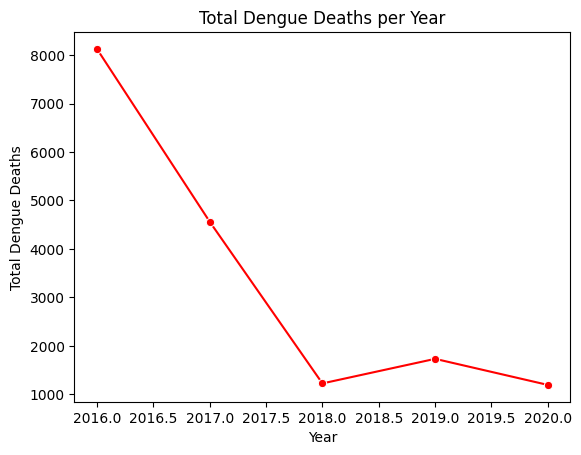

<Figure size 1200x600 with 0 Axes>

In [19]:
yearly_deaths = deng.groupby("Year")["Dengue_Deaths"].sum()

sns.lineplot(x=yearly_deaths.index, y=yearly_deaths.values, marker="o", color="red")
plt.title("Total Dengue Deaths per Year")
plt.xlabel("Year")
plt.ylabel("Total Dengue Deaths")
plt.figure(figsize=(12, 6))
plt.show()


<h2>Question No.5: </h2>

<h3>During the months of October and September, dengue-related deaths peak, likely due to increased mosquito breeding facilitated by higher humidity and rainfall, creating ideal conditions for mosquito larvae to thrive.</h3>

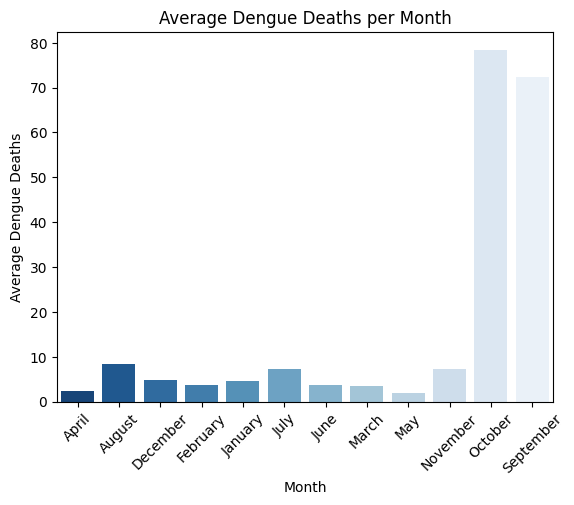

<Figure size 1200x600 with 0 Axes>

In [20]:
monthly_deaths = deng.groupby("Month")["Dengue_Deaths"].mean().sort_values()

sns.barplot(x=monthly_deaths.index, y=monthly_deaths.values, palette="Blues_r")
plt.title("Average Dengue Deaths per Month")
plt.xlabel("Month")
plt.ylabel("Average Dengue Deaths")
plt.xticks(rotation=45)
plt.figure(figsize=(12, 6))
plt.show()


<h2>Question No.6: </h2>

<h3>In 2019, the total dengue cases per year peaked at over 400,000, marking the highest recorded outbreak.</h3>

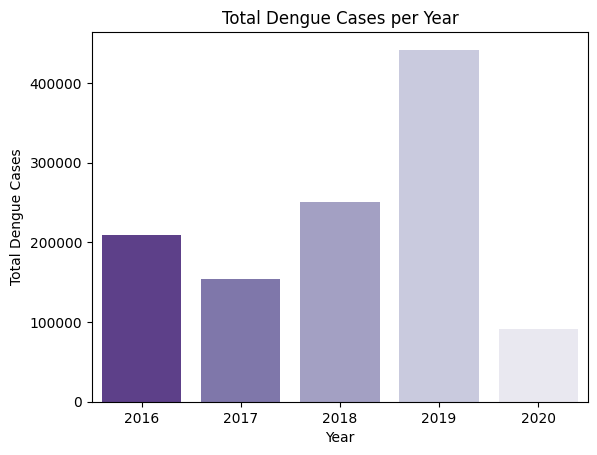

<Figure size 1200x600 with 0 Axes>

In [21]:
yearly_cases = deng.groupby("Year")["Dengue_Cases"].sum()

sns.barplot(x=yearly_cases.index, y=yearly_cases.values, palette="Purples_r")
plt.title("Total Dengue Cases per Year")
plt.xlabel("Year")
plt.ylabel("Total Dengue Cases")
plt.figure(figsize=(12, 6))
plt.show()


<h2>Question No.7: </h2>

<h3>The trend analysis of dengue cases per month across regions reveals seasonal variations in dengue outbreaks. Generally, dengue cases tend to increase during the rainy months, likely due to higher mosquito breeding activity. </h3>

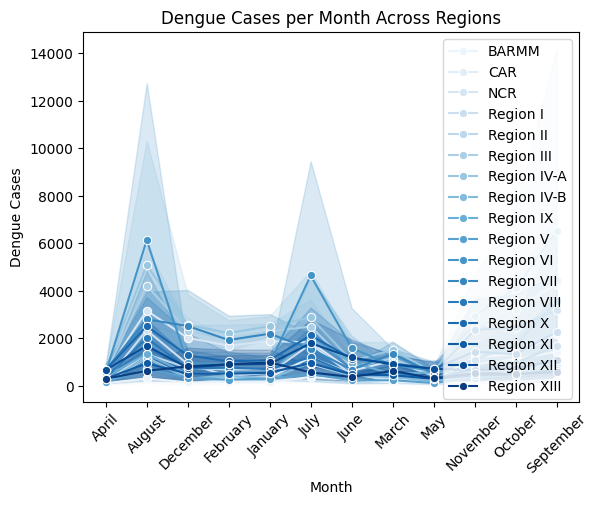

<Figure size 1000x800 with 0 Axes>

In [31]:
sns.lineplot(data=deng, x='Month', y='Dengue_Cases', hue='Region', marker='o', palette='Blues')
plt.title('Dengue Cases per Month Across Regions')
plt.xlabel('Month')
plt.ylabel('Dengue Cases')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.figure(figsize=(10, 8))
plt.show()


<h2>Question No.8: </h2>

<h3>Region IV-A and Region III have the highest total number of dengue cases among all regions.</h3>

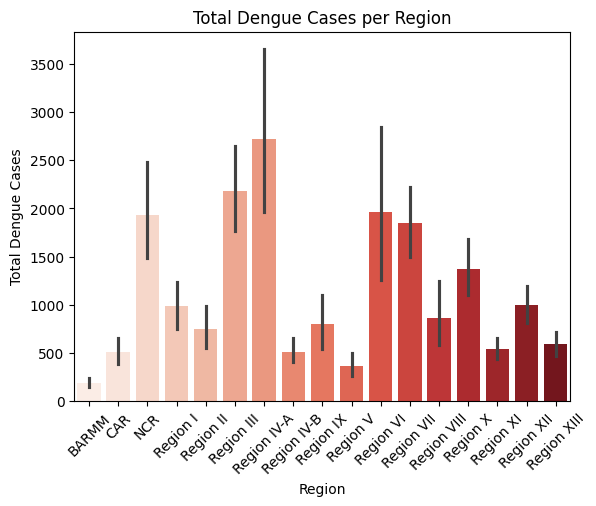

<Figure size 1200x600 with 0 Axes>

In [23]:
sns.barplot(data=deng, x='Region', y='Dengue_Cases', palette='Reds')
plt.title('Total Dengue Cases per Region')
plt.xlabel('Region')
plt.ylabel('Total Dengue Cases')
plt.xticks(rotation=45)
plt.figure(figsize=(12, 6))
plt.show()

<h2>Question No.9: </h2>

<h3>The pie chart reveals that certain regions experience a significantly higher proportion of dengue cases compared to others. This suggests that environmental, climatic, or population density factors may contribute to the increased case load in specific areas.</h3>

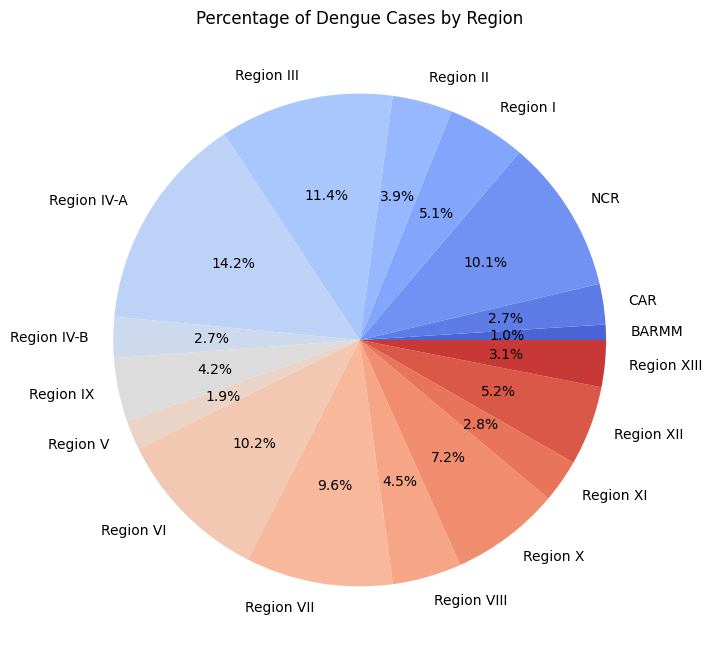

In [33]:
dengue_cases_by_region = deng.groupby('Region')['Dengue_Cases'].sum()

plt.figure(figsize=(8, 8))
plt.pie(dengue_cases_by_region, labels=dengue_cases_by_region.index, autopct='%1.1f%%', 
        colors=sns.color_palette("coolwarm", len(dengue_cases_by_region)))
plt.title('Percentage of Dengue Cases by Region')
plt.show()


<h2>Question No.10: </h2>

<h3>The histogram shows the distribution of dengue cases, revealing that most recorded cases are on the lower end, with a right-skewed distribution. This suggests that while most regions report relatively low to moderate dengue cases, there are occasional spikes with significantly higher case counts.</h3>

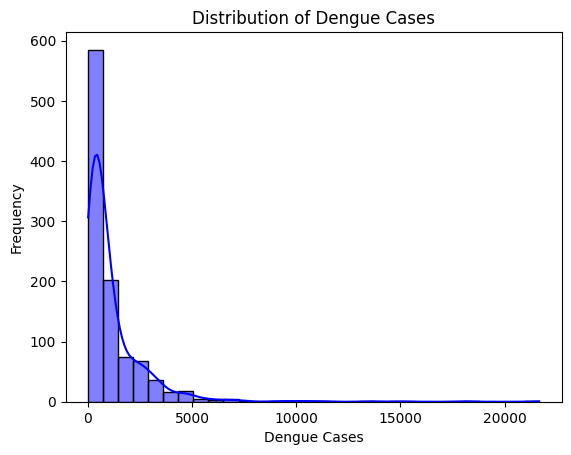

<Figure size 1000x600 with 0 Axes>

In [34]:
sns.histplot(deng['Dengue_Cases'], bins=30, kde=True, color='blue')
plt.title('Distribution of Dengue Cases')
plt.xlabel('Dengue Cases')
plt.ylabel('Frequency')
plt.figure(figsize=(10, 6))
plt.show()


<h2>Question No.11: </h2>

<h3>The scatter plot shows a positive correlation between dengue cases and dengue deaths. Regions with a higher number of cases tend to report more deaths.</h3>

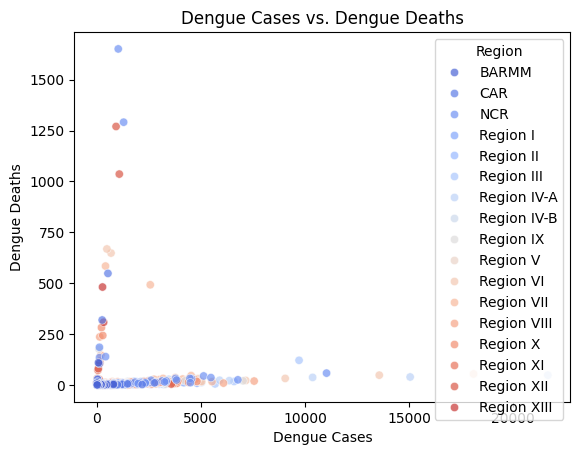

<Figure size 1000x600 with 0 Axes>

In [35]:
sns.scatterplot(data=deng, x='Dengue_Cases', y='Dengue_Deaths', hue='Region', palette='coolwarm', alpha=0.7)
plt.title('Dengue Cases vs. Dengue Deaths')
plt.xlabel('Dengue Cases')
plt.ylabel('Dengue Deaths')
plt.figure(figsize=(10, 6))
plt.show()



<h2>Question No.12: </h2>

<h3>The violin plot illustrates the distribution of dengue cases across different regions, revealing significant variability in outbreaks. Some regions show a wider spread of cases, indicating fluctuations in the number of reported cases over time. </h3>

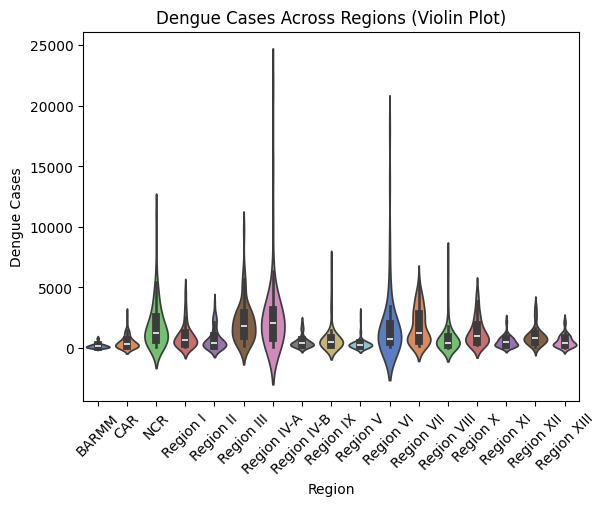

<Figure size 1200x600 with 0 Axes>

In [36]:
sns.violinplot(data=deng, x='Region', y='Dengue_Cases', palette='muted')
plt.title('Dengue Cases Across Regions (Violin Plot)')
plt.xlabel('Region')
plt.ylabel('Dengue Cases')
plt.xticks(rotation=45)
plt.figure(figsize=(12, 6))
plt.show()

<h2>Question No.13: </h2>

<h3>The bar chart shows that dengue cases follow a seasonal pattern. The number of cases is highest in the middle and later months of the year, likely because the rainy season creates more places for mosquitoes to breed.</h3>

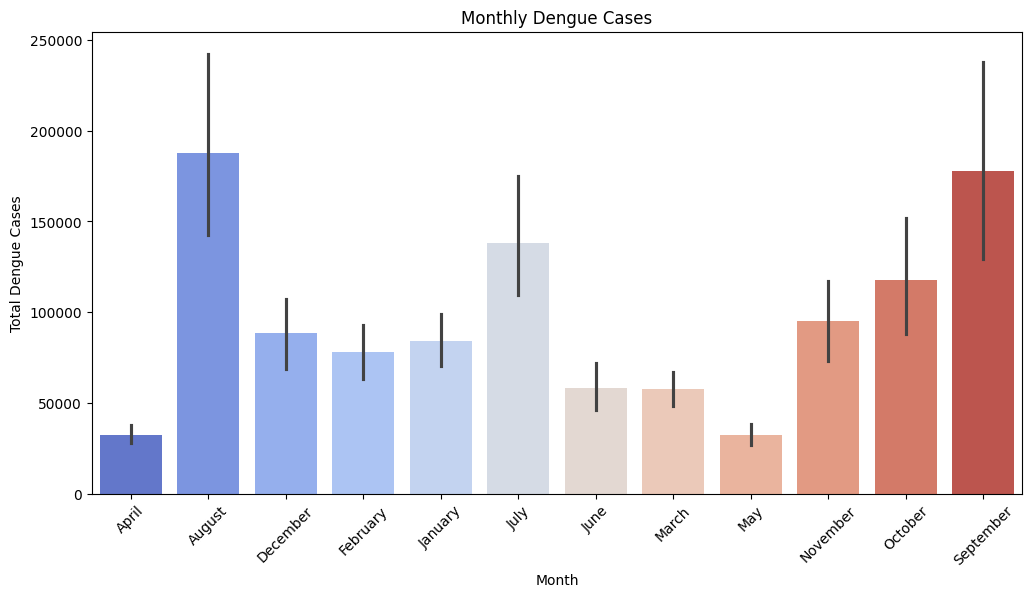

In [37]:
plt.figure(figsize=(12, 6))
sns.barplot(data=deng, x='Month', y='Dengue_Cases', estimator=np.sum, palette='coolwarm')
plt.title('Monthly Dengue Cases')
plt.xlabel('Month')
plt.ylabel('Total Dengue Cases')
plt.xticks(rotation=45)
plt.show()

<h2>Question No.14: </h2>

<h3>Dengue deaths mostly happen in September and October, which is the rainy season. This is likely connected to the high number of dengue cases during these months.</h3>

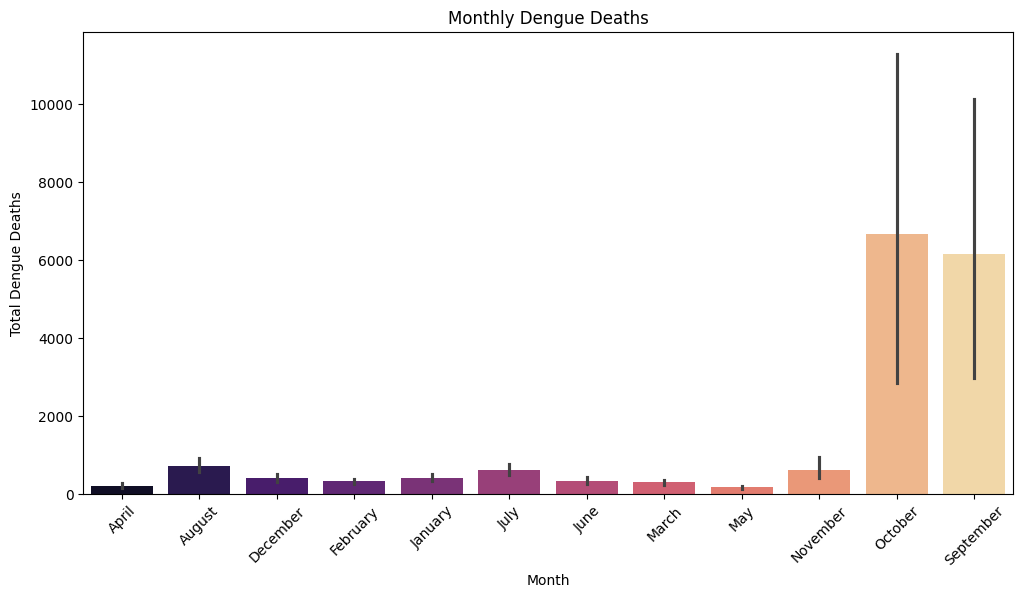

In [38]:
plt.figure(figsize=(12, 6))
sns.barplot(data=deng, x='Month', y='Dengue_Deaths', estimator=np.sum, palette='magma')
plt.title('Monthly Dengue Deaths')
plt.xlabel('Month')
plt.ylabel('Total Dengue Deaths')
plt.xticks(rotation=45)
plt.show()

<h2>Question No.15: </h2>

<h3>Some regions have times when dengue cases suddenly increase. This might happen because of the weather or other natural reasons.


Some regions always have more dengue cases than others. This could be because more people live there, the weather is different, or the government has different health programs.

In some places, dengue cases are going up, which means the outbreaks are getting worse. In other places, the cases are going down, which might mean better efforts to stop the disease.</h3>

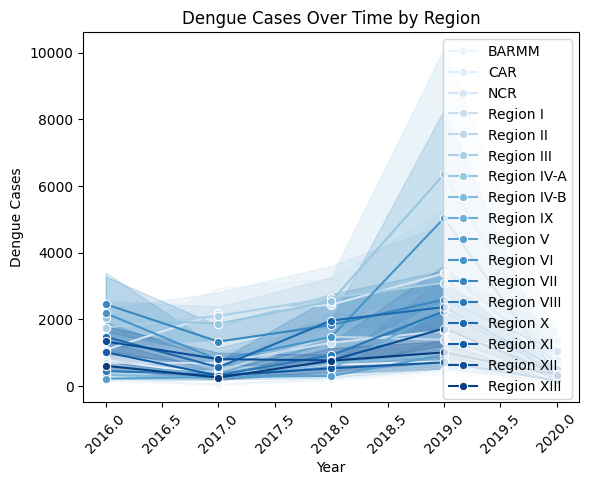

<Figure size 1400x700 with 0 Axes>

In [39]:
sns.lineplot(data=deng, x="Year", y="Dengue_Cases", hue="Region", marker="o", palette="Blues")
plt.title("Dengue Cases Over Time by Region")
plt.xlabel("Year")
plt.ylabel("Dengue Cases")
plt.xticks(rotation=45)
plt.legend(loc="upper right")
plt.figure(figsize=(14, 7))
plt.show()

<h2>Question No.16: </h2>

<h3>The year with the most dengue cases recorded was 2019. This means there was a major outbreak that year, possibly due to weather conditions, increased mosquito activity, or other factors. </h3>

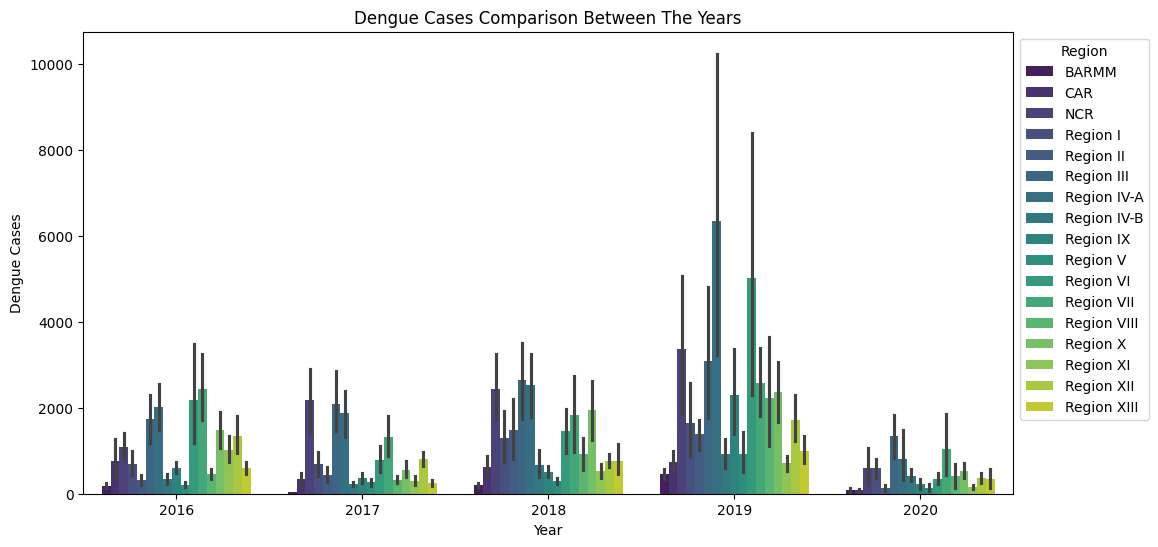

In [46]:
plt.figure(figsize=(12, 6))
sns.barplot(data=deng, x='Year', y='Dengue_Cases', hue='Region', palette='viridis')
plt.title('Dengue Cases Comparison Between The Years')
plt.xlabel('Year')
plt.ylabel('Dengue Cases')
plt.legend(title='Region', bbox_to_anchor=(1, 1))
plt.show()

<h2>Question No.17: </h2>

<h3>Dengue cases increase in certain months, likely due to the rainy season, which helps mosquitoes breed.
Some regions have more cases than others, showing where dengue is a bigger problem.
Certain months consistently have high cases, meaning extra precautions are needed during these times.</h3>

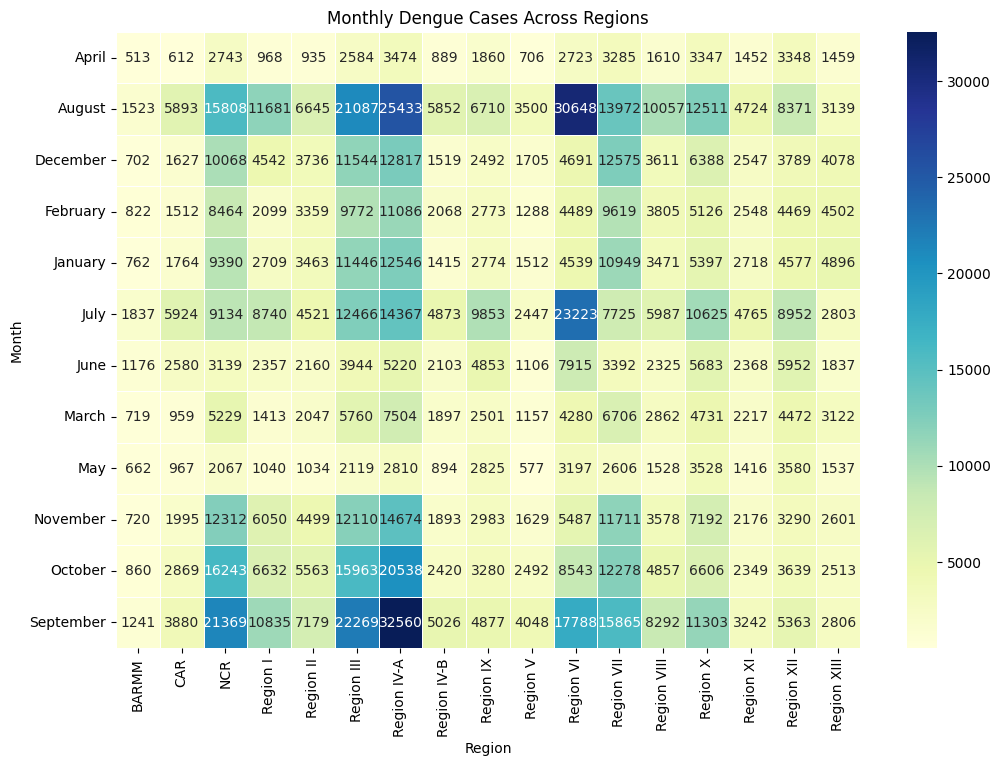

In [42]:
pivot_table = deng.pivot_table(index="Month", columns="Region", values="Dengue_Cases", aggfunc="sum")
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap="YlGnBu", linewidths=0.5, annot=True, fmt=".0f")
plt.title("Monthly Dengue Cases Across Regions")
plt.xlabel("Region")
plt.ylabel("Month")
plt.show()


<h2>Question No.18: </h2>

<h3>The heatmap highlights that August and September of 2019 had an alarming spike in dengue cases. This suggests a major outbreak during this period, likely due to favorable conditions for mosquito breeding </h3>

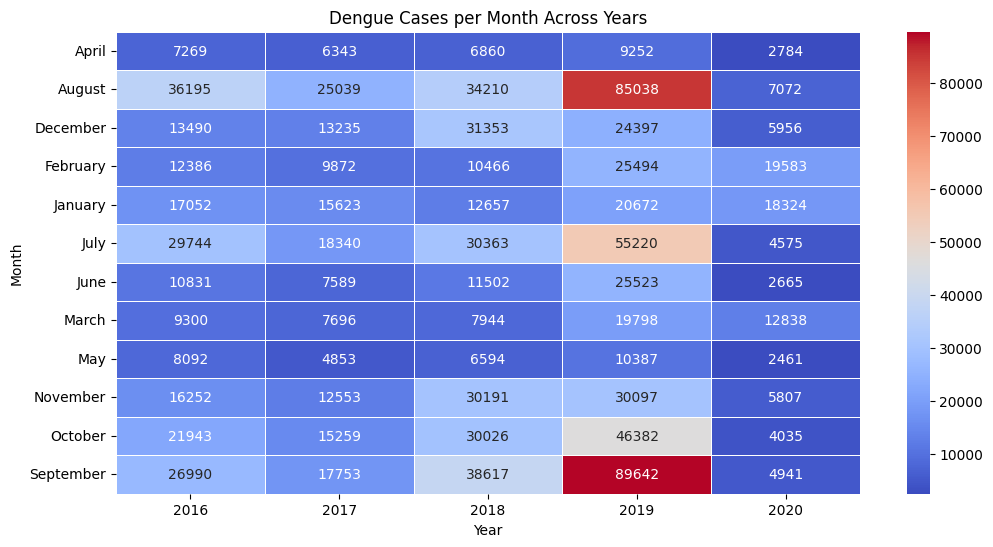

In [43]:
monthly_cases = deng.pivot_table(index='Month', columns='Year', values='Dengue_Cases', aggfunc=np.sum)
plt.figure(figsize=(12, 6))
sns.heatmap(monthly_cases, cmap='coolwarm', annot=True, fmt='.0f', linewidths=0.5)
plt.title('Dengue Cases per Month Across Years')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()

<h2>Question No.19: </h2>

<h3>The bar plot shows that in 2016, dengue-related deaths reached their highest point despite having fewer dengue cases. In contrast, 2019 recorded the highest number of dengue cases but had relatively fewer deaths.</h3>

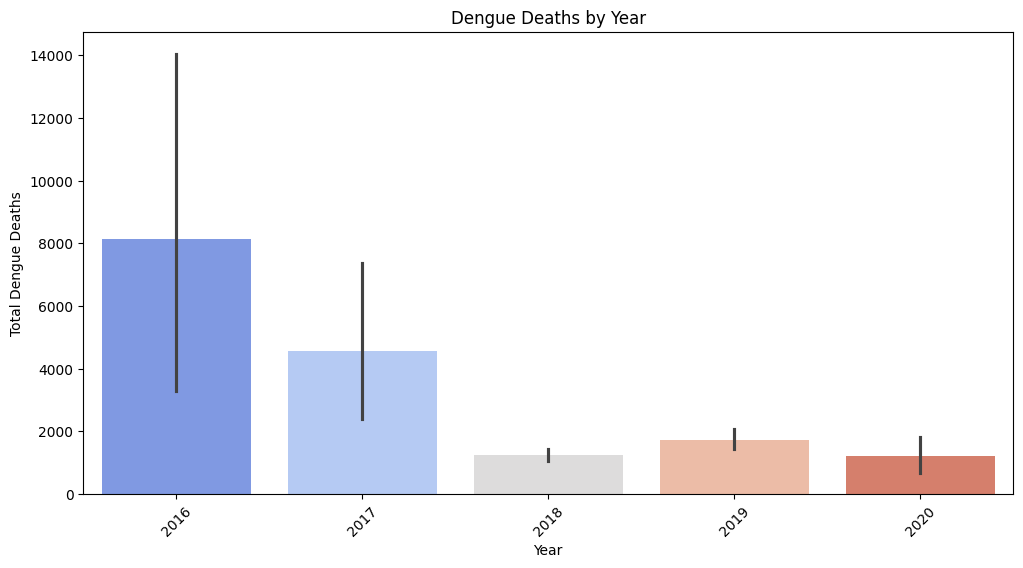

In [44]:
plt.figure(figsize=(12, 6))
sns.barplot(data=deng, x='Year', y='Dengue_Deaths', estimator=np.sum, palette='coolwarm')
plt.title('Dengue Deaths by Year')
plt.xlabel('Year')
plt.ylabel('Total Dengue Deaths')
plt.xticks(rotation=45)
plt.show()

<h2>Question No.20: </h2>

<h3>The number of dengue cases varies significantly across regions, with some regions experiencing notably higher case counts.
Dengue deaths are considerably lower than total cases but are still present in most regions.
Regions with high case counts do not necessarily have the highest deaths, indicating possible differences in healthcare response, reporting, or disease severity.</h3>

<Figure size 1200x600 with 0 Axes>

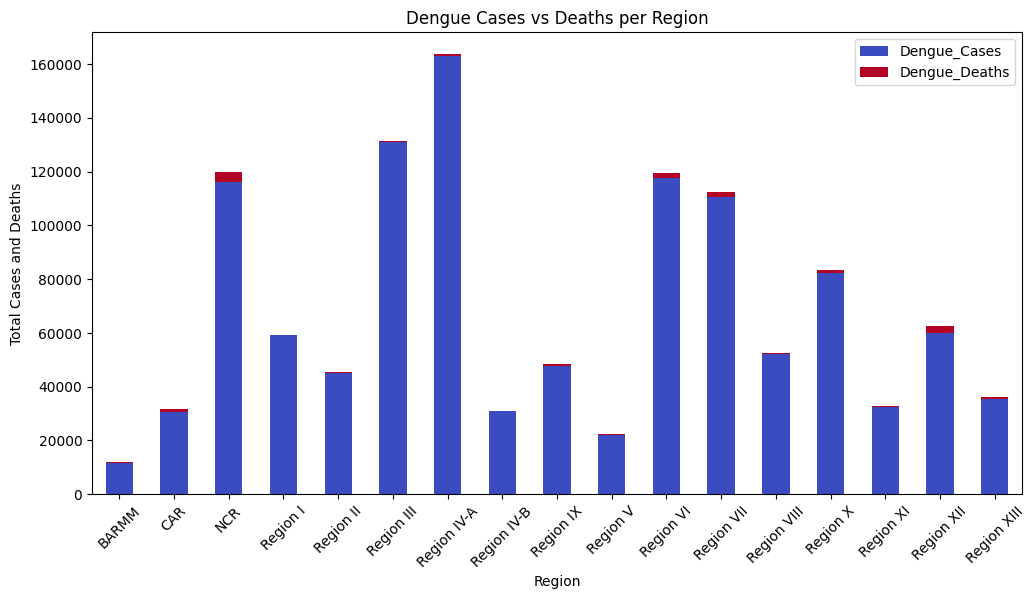

In [45]:
plt.figure(figsize=(12, 6))
deng_grouped = deng.groupby('Region')[['Dengue_Cases', 'Dengue_Deaths']].sum().reset_index()
deng_grouped.plot(x='Region', kind='bar', stacked=True, figsize=(12, 6), colormap='coolwarm')
plt.title('Dengue Cases vs Deaths per Region')
plt.xlabel('Region')
plt.ylabel('Total Cases and Deaths')
plt.xticks(rotation=45)
plt.show()